In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [9]:
# Импортируем необходимую функцию
from sklearn.datasets import fetch_openml

# Загрузка датасета "wine-quality-red" из OpenML
dataset = fetch_openml(name='wine-quality-red', version=1, as_frame=True)

# Выводим текстовое описание датасета
print(dataset.DESCR)

# Обозначаем целевую переменную за y, а остальные данные за X
X = dataset.data
y = dataset.target

# Дополнительно можно вывести первые несколько строк для проверки
print(X.head())
print(y.head())


wine-quality-red-pmlb

Downloaded from openml.org.
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.

In [4]:
num_rows, num_columns = X.shape
print(f"Число строк (объектов): {num_rows}")
print(f"Число столбцов (признаков): {num_columns}\n")

# 2. Информация о датасете
print("Информация о датасете:")
print(X.info())
print("\n")

# 3. Статистическое описание признаков
print("Статистическое описание признаков:")
print(X.describe())
print("\n")

# 4. Дополнительно: Проверка на пропущенные значения
print("Количество пропущенных значений в каждом признаке:")
print(X.isnull().sum())

Число строк (объектов): 1599
Число столбцов (признаков): 11

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB
None


Статистическое описание признаков:
       fixed_acidity  volatile_acidity  citric_acid  residual

In [5]:
# Проверка на пропущенные значения в X
missing_values_X = X.isnull().sum()
total_missing_X = missing_values_X.sum()

# Проверка на пропущенные значения в y
missing_values_y = y.isnull().sum()
total_missing_y = missing_values_y.sum()

print("Количество пропущенных значений в признаках (X):")
print(missing_values_X)
print(f"Общее количество пропущенных значений в X: {total_missing_X}\n")

print("Количество пропущенных значений в целевой переменной (y):")
print(missing_values_y)
print(f"Общее количество пропущенных значений в y: {total_missing_y}\n")

# Заполнение пропущенных значений медианными значениями (если имеются)
if total_missing_X > 0:
    print("Заполнение пропущенных значений в X медианными значениями.")
    X = X.fillna(X.median())
else:
    print("В данных X нет пропущенных значений.\n")

if total_missing_y > 0:
    print("Заполнение пропущенных значений в y медианными значениями.")
    y = y.fillna(y.median())
else:
    print("В целевой переменной y нет пропущенных значений.\n")


Количество пропущенных значений в признаках (X):
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64
Общее количество пропущенных значений в X: 0

Количество пропущенных значений в целевой переменной (y):
0
Общее количество пропущенных значений в y: 0

В данных X нет пропущенных значений.

В целевой переменной y нет пропущенных значений.


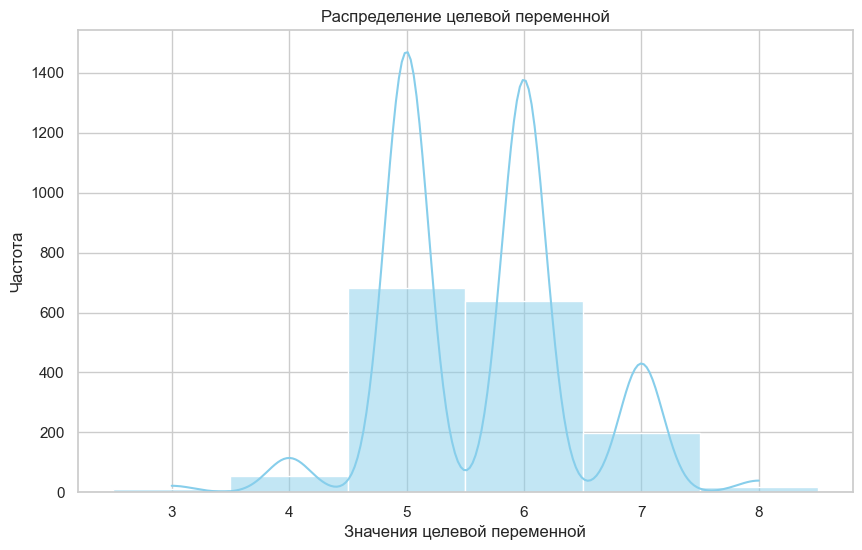

In [7]:
sns.set(style="whitegrid")
# Построение гистограммы с KDE
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True, color='skyblue')
plt.title('Распределение целевой переменной')
plt.xlabel('Значения целевой переменной')
plt.ylabel('Частота')
plt.show()


In [10]:
import numpy as np
import pandas as pd

# Предполагаем, что X и y уже определены и очищены из предыдущих шагов
# Преобразуем X и y в numpy массивы
X = X.values  # Преобразование DataFrame в numpy массив
y = y.values.astype(float)  # Преобразование Series в numpy массив с типом float

# Добавим столбец единиц для смещения (bias term) в матрицу признаков
X = np.hstack((X, np.ones((X.shape[0], 1))))  # Последний столбец - bias

# Обновим список признаков для ясности
features = list(dataset.data.columns) + ['bias']

# Просмотр формы данных
print(f"Форма X: {X.shape}")
print(f"Форма y: {y.shape}")


Форма X: (1599, 12)
Форма y: (1599,)


X уже является numpy.ndarray.
y уже является numpy.ndarray.

Проверка X на NaN и бесконечные значения:
NaN: 0
Inf: 0

Проверка y на NaN и бесконечные значения:
NaN: 0
Inf: 0

Форма X после масштабирования: (1599, 12)

Начальные веса: [ 0.01082966 -0.00112366 -0.00437155 -0.00331779  0.01928522 -0.01724151
  0.00189092 -0.0146182   0.0013065   0.00041999 -0.01861713 -0.00675137]

Эпоха 100/1000, Потеря: 21.9701
Эпоха 200/1000, Потеря: 14.8432
Эпоха 300/1000, Потеря: 10.0768
Эпоха 400/1000, Потеря: 6.8873
Эпоха 500/1000, Потеря: 4.7520
Эпоха 600/1000, Потеря: 3.3221
Эпоха 700/1000, Потеря: 2.3644
Эпоха 800/1000, Потеря: 1.7227
Эпоха 900/1000, Потеря: 1.2928
Эпоха 1000/1000, Потеря: 1.0046

Финальные веса: [ 0.05999768 -0.16912703  0.04001574  0.03082682 -0.07654604  0.01160653
 -0.08170882 -0.09216276 -0.01434852  0.13637123  0.23530552  4.87388395]


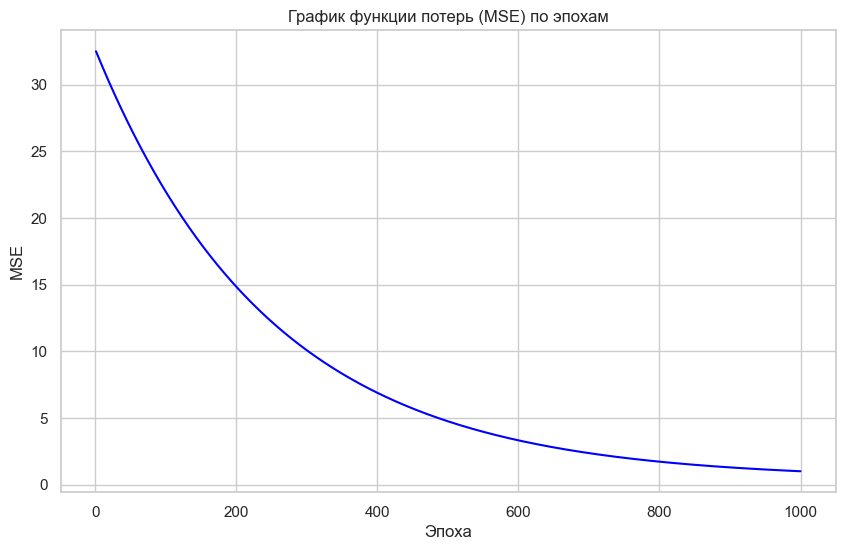

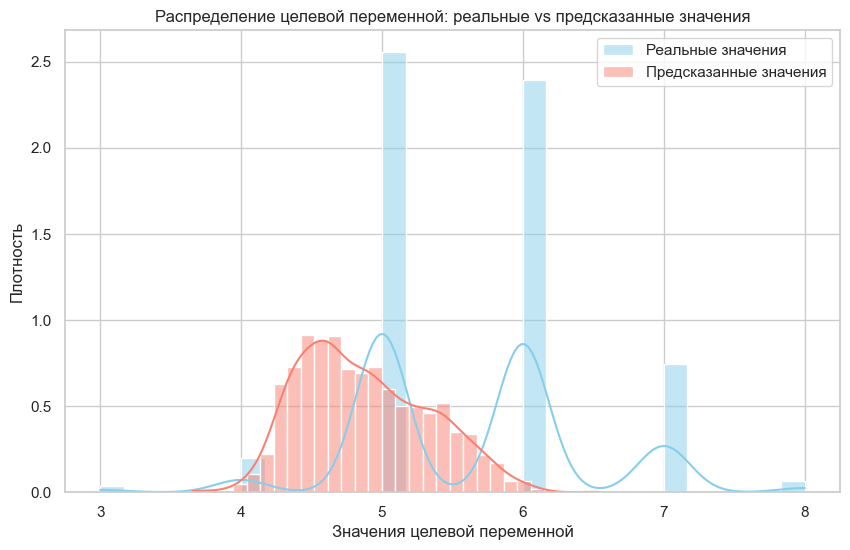

Уравнение полученной гиперплоскости:
y = 0.0600 * fixed_acidity + -0.1691 * volatile_acidity + 0.0400 * citric_acid + 0.0308 * residual_sugar + -0.0765 * chlorides + 0.0116 * free_sulfur_dioxide + -0.0817 * total_sulfur_dioxide + -0.0922 * density + -0.0143 * pH + 0.1364 * sulphates + 0.2353 * alcohol + 4.8739 * bias


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Проверка и преобразование X в numpy массив, если необходимо
if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
    X = X.values
    print("X преобразован из pandas DataFrame/Series в numpy.ndarray.")
else:
    print("X уже является numpy.ndarray.")

if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
    y = y.values.astype(float)
    print("y преобразован из pandas DataFrame/Series в numpy.ndarray.")
else:
    print("y уже является numpy.ndarray.")

# Проверка на NaN или бесконечные значения
print("\nПроверка X на NaN и бесконечные значения:")
print("NaN:", np.isnan(X).sum())
print("Inf:", np.isinf(X).sum())

print("\nПроверка y на NaN и бесконечные значения:")
print("NaN:", np.isnan(y).sum())
print("Inf:", np.isinf(y).sum())

# Масштабирование признаков
scaler = StandardScaler()
X_features = X[:, :-1]  # Все столбцы кроме последнего (bias)
X_scaled = scaler.fit_transform(X_features)
X = np.hstack((X_scaled, X[:, -1].reshape(-1,1)))  # Последний столбец - bias

print("\nФорма X после масштабирования:", X.shape)

# Инициализация весов случайными небольшими значениями
n_features = X.shape[1]  # Количество признаков включая bias
weights = np.random.randn(n_features) * 0.01

print(f"\nНачальные веса: {weights}\n")

# Параметры градиентного спуска
learning_rate = 0.001  # Уменьшили с 0.01 до 0.001
n_epochs = 1000
m = X.shape[0]  # Количество объектов

# Для хранения истории потерь
loss_history = []

for epoch in range(n_epochs):
    # Предсказания модели
    y_pred = np.dot(X, weights)
    
    # Вычисление ошибки
    error = y_pred - y
    
    # Вычисление функции потерь (MSE)
    loss = np.mean(error ** 2)
    loss_history.append(loss)
    
    # Проверка на NaN
    if np.isnan(loss):
        print(f"Эпоха {epoch+1}: Обнаружена NaN в значении потерь. Остановка обучения.")
        break
    
    # Вычисление градиентов
    gradients = (2/m) * np.dot(X.T, error)
    
    # Проверка градиентов на NaN
    if np.isnan(gradients).any():
        print(f"Эпоха {epoch+1}: Обнаружены NaN в градиентах. Остановка обучения.")
        break
    
    # Обновление весов
    weights -= learning_rate * gradients
    
    # Печать потерь каждые 100 эпох
    if (epoch+1) % 100 == 0:
        print(f"Эпоха {epoch+1}/{n_epochs}, Потеря: {loss:.4f}")

# Финальные веса
print(f"\nФинальные веса: {weights}\n")

# Визуализация функции потерь
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_history) + 1), loss_history, color='blue')
plt.title('График функции потерь (MSE) по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

# Предсказание окончательных значений
y_pred_final = np.dot(X, weights)

# Визуализация распределения целевой переменной: реальные vs предсказанные значения
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True, color='skyblue', label='Реальные значения', stat="density")
sns.histplot(y_pred_final, bins=30, kde=True, color='salmon', label='Предсказанные значения', stat="density")
plt.title('Распределение целевой переменной: реальные vs предсказанные значения')
plt.xlabel('Значения целевой переменной')
plt.ylabel('Плотность')
plt.legend()
plt.show()

# Форматирование уравнения гиперплоскости
equation = "y = "
for i in range(n_features - 1):
    equation += f"{weights[i]:.4f} * {features[i]} + "
equation += f"{weights[-1]:.4f} * bias"

print(f"Уравнение полученной гиперплоскости:\n{equation}")


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Инициализируем модель линейной регрессии
model_sklearn = LinearRegression()

# Обучаем модель на тех же данных X и y
model_sklearn.fit(X, y)

# Предсказываем значения целевой переменной
y_pred_sklearn = model_sklearn.predict(X)


# Вычисляем среднеквадратичную ошибку (MSE)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
print(f"MSE модели scikit-learn: {mse_sklearn:.4f}")

# Извлекаем коэффициенты модели
coefficients_sklearn = model_sklearn.coef_

# Извлекаем смещение (bias) модели
intercept_sklearn = model_sklearn.intercept_

# Форматируем уравнение гиперплоскости
equation_sklearn = "y = "
for i in range(len(coefficients_sklearn) - 1):
    equation_sklearn += f"{coefficients_sklearn[i]:.4f} * {features[i]} + "
equation_sklearn += f"{coefficients_sklearn[-1]:.4f} * {features[-1]}"

print(f"\nУравнение гиперплоскости, полученное с помощью scikit-learn:\n{equation_sklearn}")

# Предполагается, что веса ручной модели сохранены в `weights_manual`
# Например:
# weights_manual = np.array([0.5679, -0.1235, ..., 1.2346])

# Извлекаем веса из ручной модели
weights_manual = weights  # Предполагается, что переменная `weights` содержит веса

# Извлекаем веса из модели scikit-learn
weights_sklearn = np.append(coefficients_sklearn, intercept_sklearn)

# Выводим оба набора весов
print("\nВесы модели, написанной своими руками:")
print(weights_manual)

print("\nВесы модели scikit-learn:")
print(weights_sklearn)

# Вычисляем разницу между весами
difference = weights_manual - weights_sklearn
print("\nРазница между весами (ручная модель - scikit-learn):")
print(difference)

# Визуализация распределения предсказанных значений
plt.figure(figsize=(12, 6))

# Гистограмма предсказаний ручной модели
sns.histplot(y_pred_final, bins=30, kde=True, color='salmon', label='Предсказанные значения (ручная модель)', stat="density")

# Гистограмма предсказаний scikit-learn модели
sns.histplot(y_pred_sklearn, bins=30, kde=True, color='green', label='Предсказанные значения (scikit-learn)', stat="density")

# Гистограмма реальных значений
sns.histplot(y, bins=30, kde=True, color='skyblue', label='Реальные значения', stat="density")

plt.title('Распределение целевой переменной: реальные vs предсказанные значения')
plt.xlabel('Значения целевой переменной')
plt.ylabel('Плотность')
plt.legend()
plt.show()


MSE модели scikit-learn: 0.4168

Уравнение гиперплоскости, полученное с помощью scikit-learn:
y = 0.0435 * fixed_acidity + -0.1940 * volatile_acidity + -0.0356 * citric_acid + 0.0230 * residual_sugar + -0.0882 * chlorides + 0.0456 * free_sulfur_dioxide + -0.1074 * total_sulfur_dioxide + -0.0337 * density + -0.0638 * pH + 0.1553 * sulphates + 0.2942 * alcohol + 0.0000 * alcohol

Весы модели, написанной своими руками:
[ 0.05999768 -0.16912703  0.04001574  0.03082682 -0.07654604  0.01160653
 -0.08170882 -0.09216276 -0.01434852  0.13637123  0.23530552  4.87388395]

Весы модели scikit-learn:
[ 0.04349735 -0.19396667 -0.03555254  0.02301871 -0.08818339  0.04560596
 -0.10735582 -0.03373717 -0.06384247  0.1552765   0.29424288  0.
  5.63602251]


ValueError: operands could not be broadcast together with shapes (12,) (13,) 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Инициализируем модель линейной регрессии
model_sklearn = LinearRegression()

# Обучаем модель на тех же данных X и y
model_sklearn.fit(X, y)

# Предсказываем значения целевой переменной
y_pred_sklearn = model_sklearn.predict(X)

# Вычисляем среднеквадратичную ошибку (MSE) для модели scikit-learn
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

# Вычисляем коэффициент детерминации (R²) для модели scikit-learn
r2_sklearn = r2_score(y, y_pred_sklearn)

print(f"MSE модели scikit-learn: {mse_sklearn:.4f}")
print(f"Коэффициент детерминации (R²) модели scikit-learn: {r2_sklearn:.4f}\n")



MSE модели scikit-learn: 0.4168
Коэффициент детерминации (R²) модели scikit-learn: 0.3606


In [19]:
# Вычисляем среднеквадратичную ошибку (MSE) для ручной модели
mse_manual = mean_squared_error(y, y_pred_final)

# Вычисляем коэффициент детерминации (R²) для ручной модели
r2_manual = r2_score(y, y_pred_final)

print(f"MSE ручной модели: {mse_manual:.4f}")
print(f"Коэффициент детерминации (R²) ручной модели: {r2_manual:.4f}\n")


MSE ручной модели: 1.0023
Коэффициент детерминации (R²) ручной модели: -0.5378


In [20]:
# Выводим метрики обеих моделей
print("Оценка моделей линейной регрессии:\n")

print("Модель scikit-learn:")
print(f"  - MSE: {mse_sklearn:.4f}")
print(f"  - R²: {r2_sklearn:.4f}\n")

print("Ручная модель:")ц
print(f"  - MSE: {mse_manual:.4f}")
print(f"  - R²: {r2_manual:.4f}\n")


Оценка моделей линейной регрессии:

Модель scikit-learn:
  - MSE: 0.4168
  - R²: 0.3606

Ручная модель:
  - MSE: 1.0023
  - R²: -0.5378
